In [1]:
import numpy as np
import math
from scipy.stats import norm
from matplotlib import pyplot as plt

# Графики функции выплат

Пример 1. Постройте графики функции выплат для опционов колл (покупка, продажа) и пут (покупка, продажа).

In [2]:
def payoff_buy_call(S, K):
    return np.maximum(S - K, 0)

def payoff_buy_put(S, K):
    return np.maximum(K - S, 0)

def payoff_sell_call(S, K):
    return -payoff_buy_call(S, K)

def payoff_sell_put(S, K):
    return -payoff_buy_put(S, K)

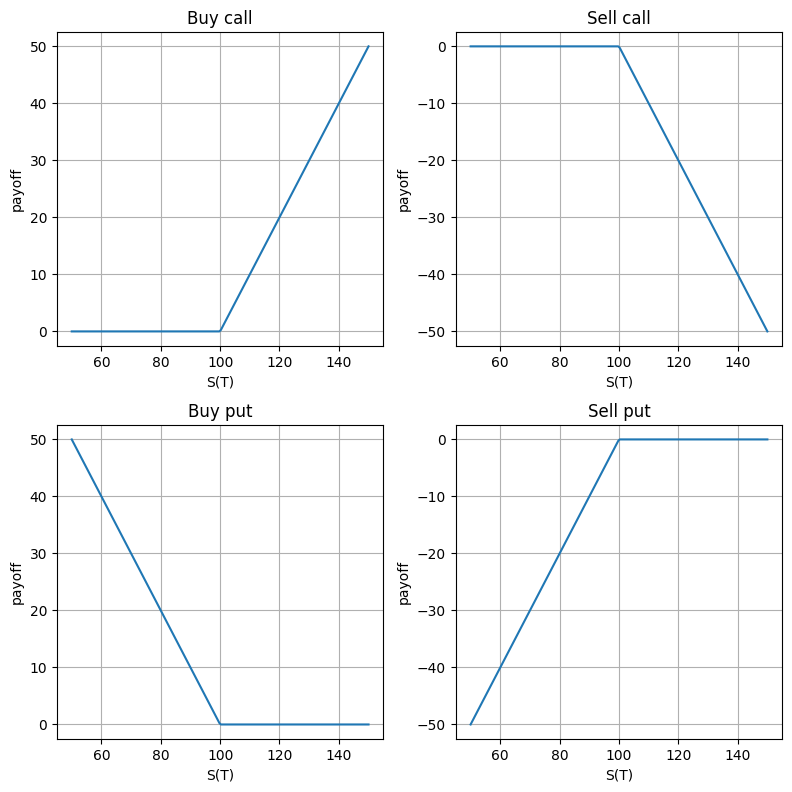

In [3]:
K = 100
S = np.linspace(50, 150, 200)

fig, ax = plt.subplots(2, 2, figsize = (8,8))
ax[0][0].plot(S, payoff_buy_call(S, K))
ax[0][0].set_xlabel("S(T)")
ax[0][0].set_ylabel("payoff")
ax[0][0].grid(True)
ax[0][0].set_title("Buy call")

ax[0][1].plot(S, payoff_sell_call(S, K))
ax[0][1].set_xlabel("S(T)")
ax[0][1].set_ylabel("payoff")
ax[0][1].grid(True)
ax[0][1].set_title("Sell call")

ax[1][0].plot(S, payoff_buy_put(S, K))
ax[1][0].set_xlabel("S(T)")
ax[1][0].set_ylabel("payoff")
ax[1][0].grid(True)
ax[1][0].set_title("Buy put")

ax[1][1].plot(S, payoff_sell_put(S, K))
ax[1][1].set_xlabel("S(T)")
ax[1][1].set_ylabel("payoff")
ax[1][1].grid(True)
ax[1][1].set_title("Sell put")

fig.tight_layout(pad=1.0)

## Задача (Collar)

  Допустим, что текущая цена базового актива равна 70.65, страйки опциона пут и колл равны 65 и 75 соответственно, а оценки их стоимости (премии) равны 2 и 3.25 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и продаже опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/collar-options-trading-strategy-python/


In [6]:
# Цена базового актива
S0 = 70.65

# Long put
K_long_put = 65
premium_long_put = 2

# Short call
K_short_call = 75
premium_short_call = 3.25

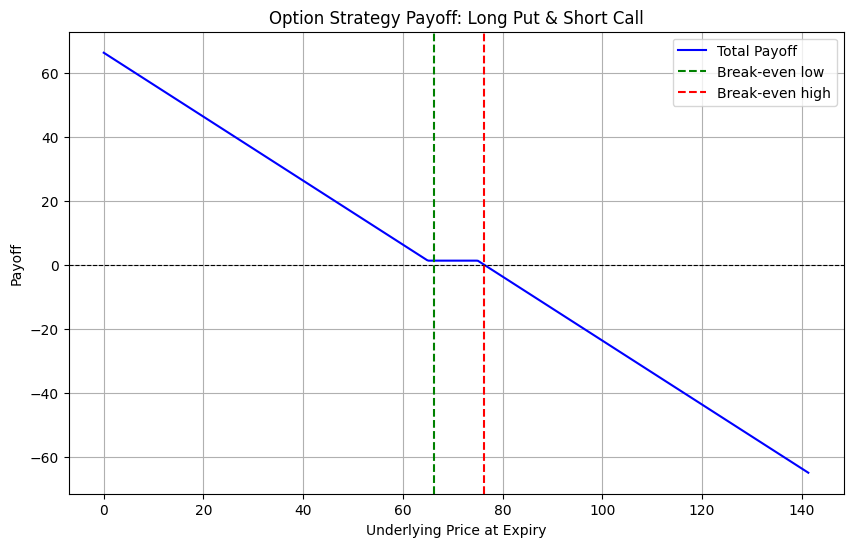

(66.25, -65.05000000000001, (66.25, 76.25))

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Цена базового актива
S = 70.65

# Long put
K_long_put = 65
premium_long_put = 2

# Short call
K_short_call = 75
premium_short_call = 3.25

# Диапазон цен базового актива
prices = np.linspace(0, S * 2, 500)

# Выплаты по long put
payoff_long_put = np.maximum(K_long_put - prices, 0) - premium_long_put

# Выплаты по short call
payoff_short_call = -(np.maximum(prices - K_short_call, 0)) + premium_short_call

# Итоговые выплаты по стратегии
total_payoff = payoff_long_put + payoff_short_call

# Интервал безубыточности
break_even_low = K_long_put - premium_long_put + premium_short_call
break_even_high = K_short_call + premium_short_call - premium_long_put

# Максимальная прибыль и убыток
max_profit = total_payoff.max()
max_loss = total_payoff.min()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(prices, total_payoff, label="Total Payoff", color="blue")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(break_even_low, color="green", linestyle="--", label="Break-even low")
plt.axvline(break_even_high, color="red", linestyle="--", label="Break-even high")
plt.title("Option Strategy Payoff: Long Put & Short Call")
plt.xlabel("Underlying Price at Expiry")
plt.ylabel("Payoff")
plt.legend()
plt.grid(True)
plt.show()

max_profit, max_loss, (break_even_low, break_even_high)


## Задача (Long Straddle)

Допустим, что текущая цена базового актива равна 172.5, страйки опциона пут и колл однинаковые и равны 200, а премии опционов равны 29.25 и 0.04 соответственно. Постройте стратегию, которая заключается в покупке опциона пут и покупке опциона колл.

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии. Постройте график функции выплат для опционной стратегии.

https://blog.quantinsti.com/straddle-options-trading-strategy-python/

In [ ]:
# Цена базового актива
S = 172.5

# Long put
K_long_put = 200
premium_long_put = 29.25

# Long call
K_long_call = 200
premium_long_call = 0.04

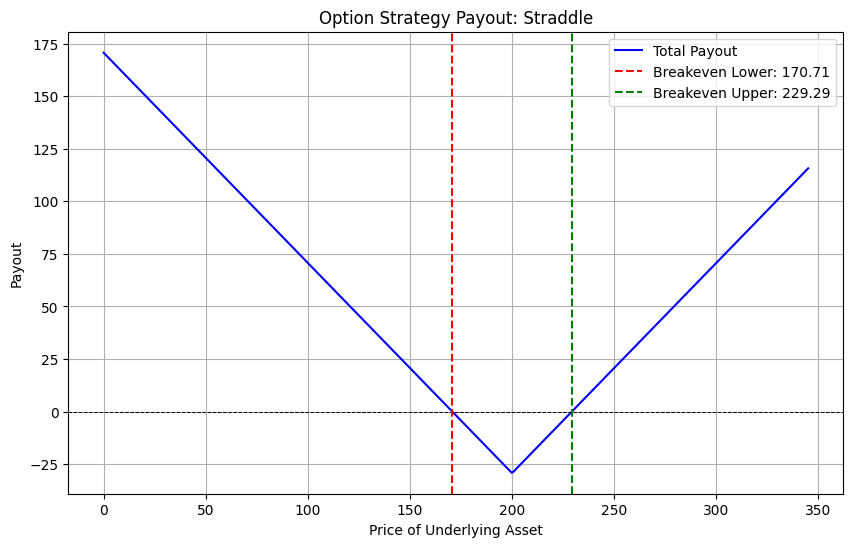

(170.71, -29.29, 170.71, 229.29)

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Данные задачи
current_price = 172.5
strike_price = 200
put_premium = 29.25
call_premium = 0.04

# Диапазон цен базового актива
prices = np.linspace(0, 2 * current_price, 500)

# Выплаты по опционам
put_payout = np.maximum(strike_price - prices, 0) - put_premium
call_payout = np.maximum(prices - strike_price, 0) - call_premium

# Общая выплата стратегии
total_payout = put_payout + call_payout

# Максимальная прибыль и потери
max_profit = max(total_payout)
max_loss = - (put_premium + call_premium)

# Интервал безубыточности
breakeven_lower = strike_price - (put_premium + call_premium)
breakeven_upper = strike_price + (put_premium + call_premium)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(prices, total_payout, label="Total Payout", color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(breakeven_lower, color='red', linestyle='--', label=f'Breakeven Lower: {breakeven_lower:.2f}')
plt.axvline(breakeven_upper, color='green', linestyle='--', label=f'Breakeven Upper: {breakeven_upper:.2f}')

# Настройки графика
plt.title("Option Strategy Payout: Straddle")
plt.xlabel("Price of Underlying Asset")
plt.ylabel("Payout")
plt.legend()
plt.grid()
plt.show()

# Вывод результатов
max_profit, max_loss, breakeven_lower, breakeven_upper


# Биноминальная модель

In [13]:
# plot_binomial_tree: visualisation of the tree and state prices
def plot_binomial_tree(statePrices):
    for i in range(0,n+1):
        for j in range(0,n+1):
            if j>i:
                break
            if i<n:
                x1, y1 = [i, i+1], [2*j-(i-1),2*j+1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="red")
                x1, y1 = [i, i+1], [2*j-(i-1),2*j-1-(i-1)]
                plt.plot(x1, y1, marker = 'o',color="black")
            plt.text(i-0.2,2*j-(i-1)-0.6,"%.2f" % statePrices["payoff"][i][j])
            plt.text(i-0.2,2*j-(i-1)-1.0,"%.2f" % statePrices["underlying"][i][j],color="blue")
    plt.title("Биноминальное дерево")
    plt.xlabel("p=%.1f%%, u=%.3f, r=%.2f%%, q=%.2f%%, dt=%.2fdays" % (statePrices["p"]*100,
                                                                   statePrices["u"],
                                                                   statePrices["r"]*100,
                                                                   statePrices["q"]*100,
                                                                   statePrices["dt"]*365))
    plt.show()

In [14]:
# binomial_tree_pricer

def binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=False):
# r: risk neutral rate
# q: dividend yield
# sigma: volatility
# T: maturity in years
# n: number of time steps
# S: spot stock price
# payoff: payoff function e.g.: lambda S: max(S-K,0)
# american: early exercise: True if american, otherwise European
# showStatePrices: print tree probabilities and state prices

    dt = T/n
    up  = np.exp(sigma*np.sqrt(dt))
    p0 = (up * np.exp((r-q) * dt) - 1) / (up**2 - 1)
    p1 = 1 - p0
    df = np.exp(-r * dt)
    # initial values at time T
    statePrices = {"p":p0, "u":up, "r":r, "q":q, "dt":dt}
    if showStatePrices:
        statePrices["payoff"]=np.zeros((n+1,n+1))
        statePrices["underlying"]=np.zeros((n+1,n+1))
    p = np.zeros(n+1)
    for i in range(n+1): # i from 0 to n incl
        p[i] = payoff(S * up**(2*i - n))
        if showStatePrices:
            statePrices["payoff"][n][i] = p[i]
            statePrices["underlying"][n][i] = S * up**(2*i - n)
    # move to earlier times
    for j in range(n-1,-1,-1): # j from n-1 to 0 incl
        for i in range(j+1): # i from 0 to j incl
            # discounted expected value of exdiv price
            p[i] = (p0 * p[i+1] + p1 * p[i])*df
            # american payoff
            if american:
                early_exercise = payoff(S * up**(2*i - j))
                p[i] = max(early_exercise,p[i])
            if showStatePrices:
                statePrices["payoff"][j][i] = p[i]
                statePrices["underlying"][j][i] = S * up**(2*i - j)
    if showStatePrices:
        plot_binomial_tree(statePrices)
    return p[0]

Пример. Текущая цена акций равна 50, волатильность 15%, цена страйк на 1% выше цены базового актива, время до экспирации 1 месяц, безрисковая ставка 5%, на акции начисляются дивиденды 2%. Постройте биноминальное дерево на 5 периодов для европейского опциона пут и оцените его стоимость.

Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)


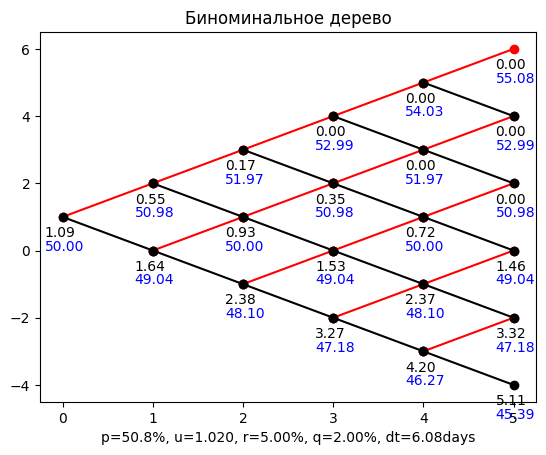

1.0853174417962133

In [ ]:
r, q, sigma, T, n, S = 0.05, 0.02, 0.15, 1/12, 5, 50
K = S*1.01
print("Биноминальное дерево, европейский опцион пут, функция выплат max(K-S, 0)")
binomial_tree_pricer(r, q, sigma, T, n, S, lambda S: max(K-S,0), american=False, showStatePrices=True)

## Задача (дерево)

Задача. Постройте биноминальные деревья для
*   американского опциона колл,
*   американского опциона пут,
*   европейского опциона колл,
*   европейского опциона пут
и сделайте выводы.





Биноминальное дерево, американский опцион колл


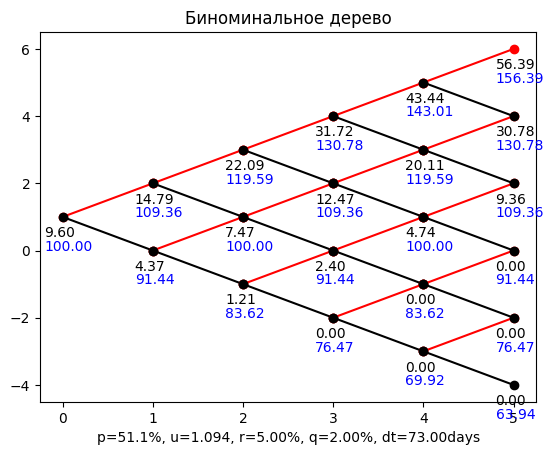

9.60248895567129

In [22]:
# Parameters for American call option
r = 0.05  # risk-free rate
q = 0.02  # dividend yield
sigma = 0.2  # volatility
T = 1  # maturity in years
n = 5  # number of time steps
S = 100  # spot stock price
K = 100  # strike price

# Payoff function for call option
payoff = lambda S: max(S - K, 0)

print("Биноминальное дерево, американский опцион колл")
binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=True, showStatePrices=True)

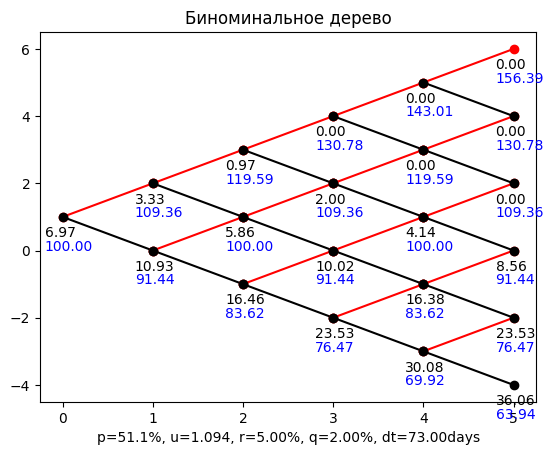

6.974637010331323

In [20]:
# Payoff function for American put option
payoff_put = lambda S: max(K - S, 0)

# Recalculate and plot for American put option
binomial_tree_pricer(r, q, sigma, T, n, S, payoff_put, american=True, showStatePrices=True)

Биноминальное дерево, американский опцион колл


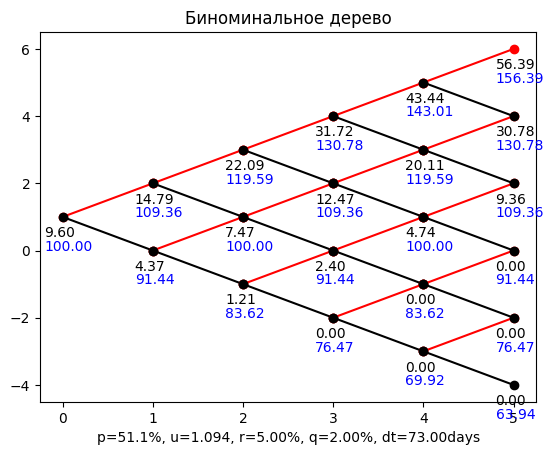

9.60248895567129

In [21]:
# Payoff function for call option
payoff = lambda S: max(S - K, 0)

print("Биноминальное дерево, американский опцион колл")
binomial_tree_pricer(r, q, sigma, T, n, S, payoff, american=False, showStatePrices=True)

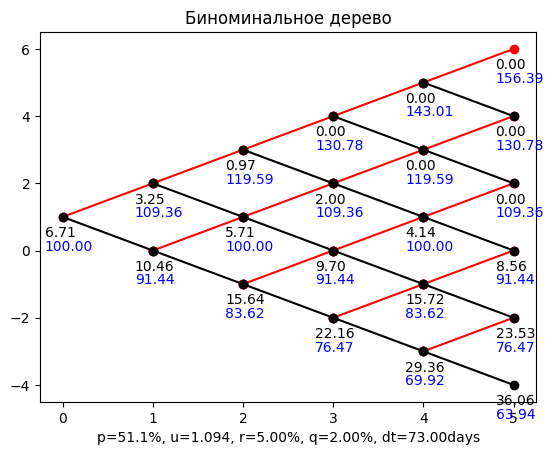

6.705564075067064

In [23]:
# Payoff function for American put option
payoff_put = lambda S: max(K - S, 0)

# Recalculate and plot for American put option
binomial_tree_pricer(r, q, sigma, T, n, S, payoff_put, american=False, showStatePrices=True)

# Модель Блека-Шоулза

Задача. Допустим, что условия модели Блека-Шоулза выполнены. Текущая цена бездивидентных акций равна 100, волатальность
5%, цена страйк 100, время до экспирации один год, безрисковая
ставка 5%.

Оцените справедливую стоимость опционов колл и пут и вычислите греческие характеристики для опционов как функцию от текущей цены базового актива.

In [25]:
r = 0.07
T = 1
K = 100
S0 = 100
sigma = 0.3
t = 0
q = 0
tau = T - t

## Задача (оценка и паритет)

In [26]:
# оценка опциона колл
def call(S, K, T, sigma, r, q):
    d1 = (np.log (S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp(-q * T) * norm.cdf(d1) - K * np.exp (-r * T) * norm.cdf(d2)

In [27]:
# оценка опциона пут
def put(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp(-q * T) * norm.cdf(-d1)

In [28]:
# оценка опциона пут с использованием паритета
def put_paritet(S, K, T, sigma, r, q):
    return call(S, K, T, sigma, r, q) + K * np.exp(-r * T) - S

Сравните результаты оценки опциона пут с/без паритета цен

In [30]:
print(put_paritet(S0, K, T, sigma, r, q))
print(put(S0, K, T, sigma, r, q))

8.44988262632198
8.449882626321987


In [31]:
params = f"r = {r}, sigma = {sigma}, t = {t}, T = {T}, S0 = {S0}, K = {K}"
print('Параметры:', params)

call_price = call(S0, K, T, sigma, r, q)
print('Оценка опциона колл =', call_price)
put_price  =  put(S0, K, T, sigma, r, q)
print('Оценка опциона пут =', put_price)

Параметры: r = 0.07, sigma = 0.3, t = 0, T = 1, S0 = 100, K = 100
Оценка опциона колл = 15.210500635727158
Оценка опциона пут = 8.449882626321987


## Задача (греческие характеристики)

Вспомогательные функции для аналитического вычисления греческих характеристик.

In [40]:
import numpy as np
from scipy.stats import norm

def delta(S, K, T, sigma, r, q, option_type='call'):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return np.exp(-q * T) * norm.cdf(d1)
    elif option_type == 'put':
        return np.exp(-q * T) * (norm.cdf(d1) - 1)

def gamma(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    return np.exp(-q * T) * norm.pdf(d1) / (S * sigma * np.sqrt(T))

def theta(S, K, T, sigma, r, q, option_type='call'):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    term1 = -S * norm.pdf(d1) * sigma * np.exp(-q * T) / (2 * np.sqrt(T))
    if option_type == 'call':
        term2 = q * S * np.exp(-q * T) * norm.cdf(d1)
        term3 = -r * K * np.exp(-r * T) * norm.cdf(d2)
        return term1 + term2 + term3
    elif option_type == 'put':
        term2 = -q * S * np.exp(-q * T) * norm.cdf(-d1)
        term3 = r * K * np.exp(-r * T) * norm.cdf(-d2)
        return term1 + term2 + term3

def vega(S, K, T, sigma, r, q):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    return S * np.exp(-q * T) * norm.pdf(d1) * np.sqrt(T)

def kappa(S, K, T, sigma, r, q, option_type='call'):
    # Также называется эластичностью или "левериджем" дельты
    _delta = delta(S, K, T, sigma, r, q, option_type)
    return S * _delta / call(S, K, T, sigma, r, q) if option_type == 'call' else S * _delta / put(S, K, T, sigma, r, q)

def ro(S, K, T, sigma, r, q, option_type='call'):
    d2 = (np.log(S / K) + (r - sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return K * T * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        return -K * T * np.exp(-r * T) * norm.cdf(-d2)


Графики зависимости греческих характеристик для опционов от цены базового актива.

In [33]:
N = 1000
x_data = np.linspace(S0 - S0/4, S0+S0/4, N)
cp_data = np.zeros((6, N))

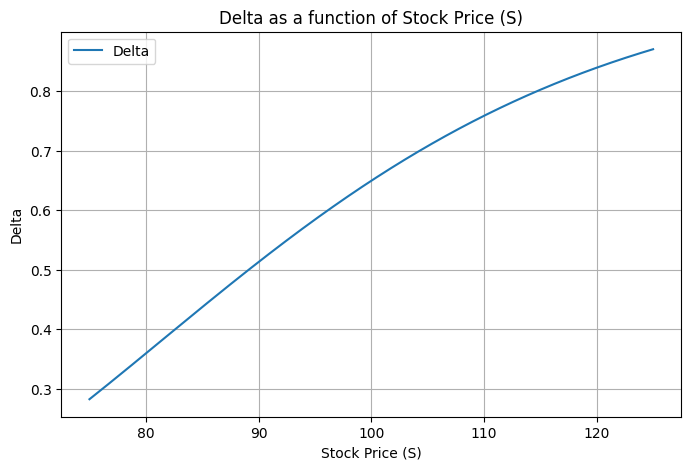

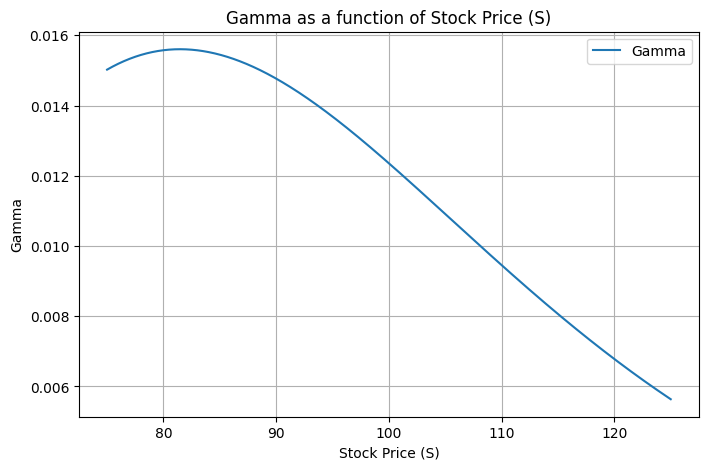

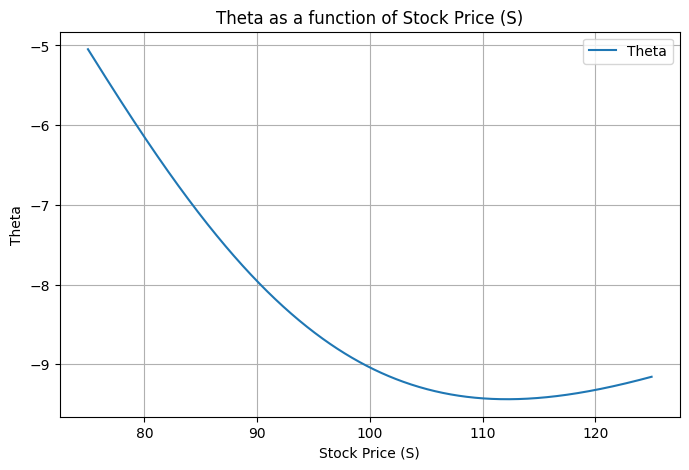

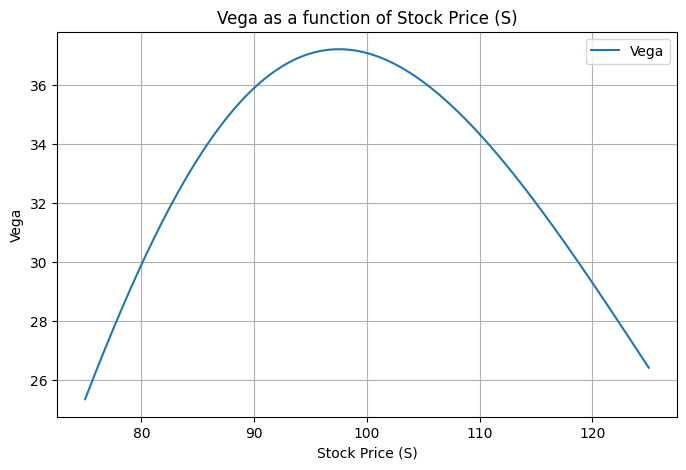

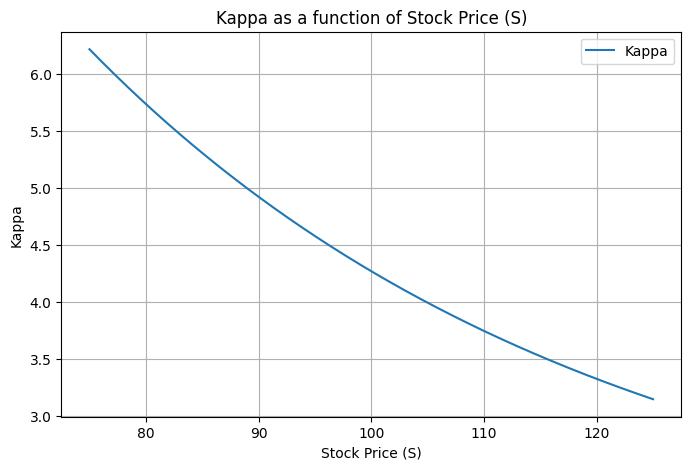

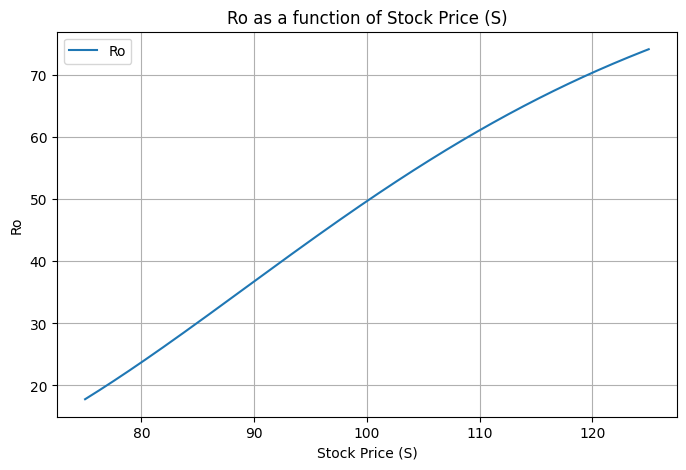

In [34]:
# Calculate Greeks
for i, S in enumerate(x_data):
    cp_data[0, i] = delta(S, K, tau, sigma, r, q, 'call')
    cp_data[1, i] = gamma(S, K, tau, sigma, r, q)
    cp_data[2, i] = theta(S, K, tau, sigma, r, q, 'call')
    cp_data[3, i] = vega(S, K, tau, sigma, r, q)
    cp_data[4, i] = kappa(S, K, tau, sigma, r, q, 'call')
    cp_data[5, i] = ro(S, K, tau, sigma, r, q, 'call')

# Plot results
greeks = ['Delta', 'Gamma', 'Theta', 'Vega', 'Kappa', 'Ro']
for i, greek in enumerate(greeks):
    plt.figure(figsize=(8, 5))
    plt.plot(x_data, cp_data[i], label=f'{greek}')
    plt.title(f'{greek} as a function of Stock Price (S)')
    plt.xlabel('Stock Price (S)')
    plt.ylabel(f'{greek}')
    plt.grid()
    plt.legend()
    plt.show()


Задача. Вычислите греческие коэффициенты численно и сравните результаты.

```
def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)
```




In [36]:
def first_derivative(f, x, h=0.001):
    return (f(x + h) - f(x - h)) / (2 * h)

def second_derivative(f, x, h=0.001):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h * h)

In [43]:
import math

# Black-Scholes price for a European call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    N_d1 = 0.5 * (1 + math.erf(d1 / math.sqrt(2)))
    N_d2 = 0.5 * (1 + math.erf(d2 / math.sqrt(2)))
    return S * N_d1 - K * math.exp(-r * T) * N_d2

# Greeks
def delta_der(f, S, h=0.001):
    return first_derivative(f, S, h)

def gamma_der(f, S, h=0.001):
    return second_derivative(f, S, h)

# Define the price function with fixed parameters other than S
price_function = lambda S: black_scholes_call(S, K, T, r, sigma)

# Numerical Greeks
delta_value = delta_der(price_function, S)
gamma_value = gamma_der(price_function, S)

# Display results
print('der')

print(f"Delta_der: {delta_value}")
print(f"Gamma_der: {gamma_value}")

print()

# Display results
print(f"Delta: {delta(S, K, T, sigma, r, q, 'call')}")
print(f"Gamma: {gamma(S, K, tau, sigma, r, q)}")


der
Delta_der: 0.8701594461371087
Gamma_der: 0.00563642288398114

Delta: 0.870159446161843
Gamma: 0.005636412009234318


Задача. Постройте график трехмерной поверхности для описания зависимости греческих коэффициентов опциона  
*   кол,
*   пут

от стоимости базового актива и
количества дней до экспирации.

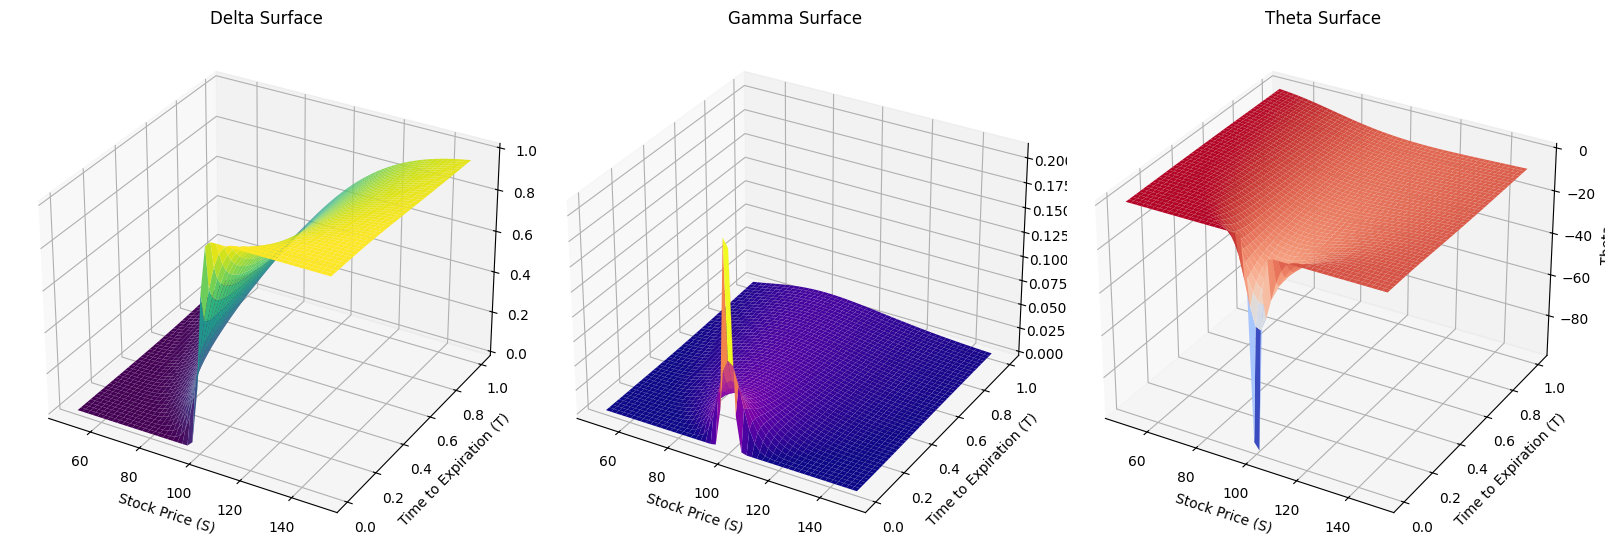

In [44]:
from mpl_toolkits.mplot3d import Axes3D

# Define the range for stock prices and days to expiration
S_range = np.linspace(S0 - S0 / 2, S0 + S0 / 2, 50)
T_range = np.linspace(1 / 365, T, 50)  # Avoid division by zero

# Prepare meshgrid
S_mesh, T_mesh = np.meshgrid(S_range, T_range)

# Compute Greeks for the 3D surface
delta_mesh = np.array([[delta(S, K, T, sigma, r, q, 'call') for S in S_range] for T in T_range])
gamma_mesh = np.array([[gamma(S, K, T, sigma, r, q) for S in S_range] for T in T_range])
theta_mesh = np.array([[theta(S, K, T, sigma, r, q, 'call') for S in S_range] for T in T_range])

# Plot 3D surfaces
fig = plt.figure(figsize=(16, 12))

# Delta surface
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(S_mesh, T_mesh, delta_mesh, cmap='viridis')
ax1.set_title('Delta Surface')
ax1.set_xlabel('Stock Price (S)')
ax1.set_ylabel('Time to Expiration (T)')
ax1.set_zlabel('Delta')

# Gamma surface
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(S_mesh, T_mesh, gamma_mesh, cmap='plasma')
ax2.set_title('Gamma Surface')
ax2.set_xlabel('Stock Price (S)')
ax2.set_ylabel('Time to Expiration (T)')
ax2.set_zlabel('Gamma')

# Theta surface
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(S_mesh, T_mesh, theta_mesh, cmap='coolwarm')
ax3.set_title('Theta Surface')
ax3.set_xlabel('Stock Price (S)')
ax3.set_ylabel('Time to Expiration (T)')
ax3.set_zlabel('Theta')

plt.tight_layout()
plt.show()


# Опционная стратегия

## Задача (по вариантам)

Задача. С использование досок опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) или [MOEX](https://www.moex.com/ru/derivatives/optionsdesk.aspx) выберите ликвидный актив и реализуейте две [опционных стратегий](https://www.option.ru/glossary/strategy), Продажа бабочки (Short Butterfly) и Синтетический короткий фьючерс (Synthetic Short Futures).

Проанализируйте как влияет соотношение  спот цены базового актива $S$ и цены страйк $K$ для

опциона call:

*   $S > K$ -- в деньгах (in the money),   
*   $S = K$ -- около денег (at the money),
*   $S < K$ --  вне денег (out of the money) и

опциона put:
*   $S < K$ -- в деньгах (in the money),
*   $S = K$ -- около денег (at the money),  
*   $S > K$ -- вне денег (out of the money).

Определите максимальную прибыль и потери, если цена базового актива может вырасти в два раза (меньше нуля не может быть). Определите интервал безубыточности стратегии с учетом премии.

Постройте график функции выплат для каждой опционной стратегии.

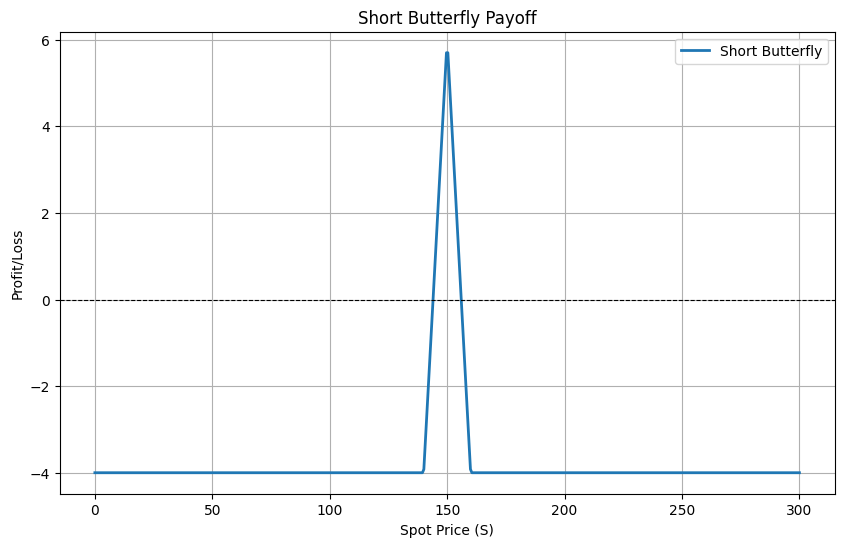

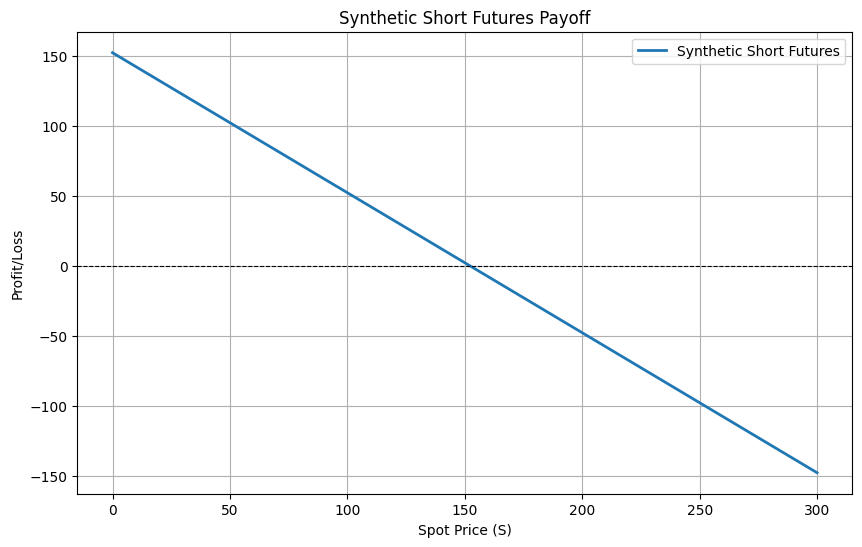

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
S = np.linspace(0, 300, 500)  # Spot price range
K1, K2, K3 = 140, 150, 160  # Strike prices for Short Butterfly
K = 150  # Strike price for Synthetic Short Futures
premium_butterfly = -4  # Net premium for Short Butterfly
premium_short_futures = 2  # Net premium for Synthetic Short Futures

# Short Butterfly Strategy
payoff_butterfly = (
    np.maximum(S - K1, 0) - 2 * np.maximum(S - K2, 0) + np.maximum(S - K3, 0) + premium_butterfly
)

# Synthetic Short Futures Strategy
payoff_short_futures = (
    -np.maximum(S - K, 0) + np.maximum(K - S, 0) + premium_short_futures
)

# Plot Short Butterfly
plt.figure(figsize=(10, 6))
plt.plot(S, payoff_butterfly, label="Short Butterfly", linewidth=2)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Short Butterfly Payoff")
plt.xlabel("Spot Price (S)")
plt.ylabel("Profit/Loss")
plt.legend()
plt.grid()
plt.show()

# Plot Synthetic Short Futures
plt.figure(figsize=(10, 6))
plt.plot(S, payoff_short_futures, label="Synthetic Short Futures", linewidth=2)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Synthetic Short Futures Payoff")
plt.xlabel("Spot Price (S)")
plt.ylabel("Profit/Loss")
plt.legend()
plt.grid()
plt.show()


In [46]:
import numpy as np
import matplotlib.pyplot as plt


In [47]:
S = np.linspace(0, 300, 1000)  # Диапазон цен базового актива
K1 = 100  # Нижний страйк
K2 = 150  # Средний страйк
K3 = 200  # Верхний страйк

# Премии (предположим фиксированные значения)
C1 = 55   # Цена опциона со страйком K1
C2 = 30   # Цена опциона со страйком K2
C3 = 10   # Цена опциона со страйком K3


In [48]:
# Прибыль от покупки опциона со страйком K1
payoff_C1 = np.maximum(S - K1, 0) - C1

# Прибыль от покупки опциона со страйком K3
payoff_C3 = np.maximum(S - K3, 0) - C3

# Прибыль от продажи двух опционов со страйком K2
payoff_2C2 = -2 * (np.maximum(S - K2, 0) - C2)

# Итоговый прибыль/убыток по стратегии
payoff_short_butterfly = payoff_C1 + payoff_C3 + payoff_2C2


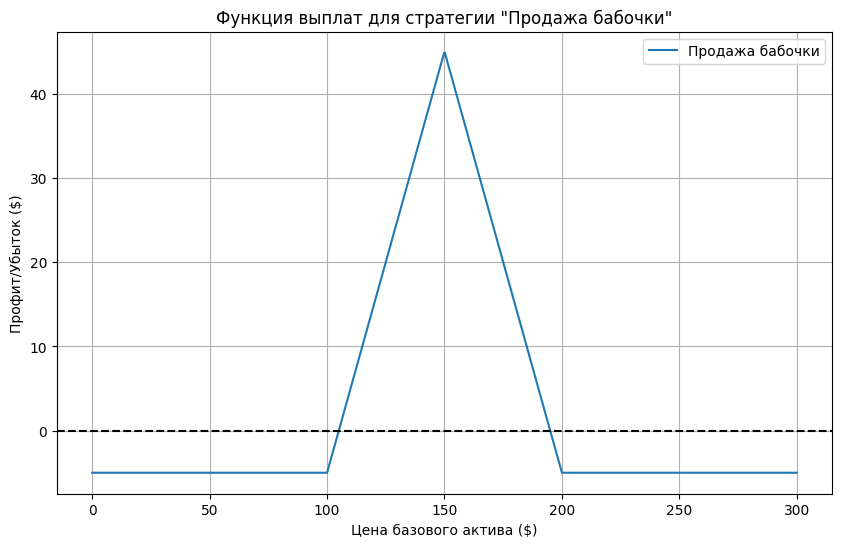

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(S, payoff_short_butterfly, label='Продажа бабочки')
plt.xlabel('Цена базового актива ($)')
plt.ylabel('Профит/Убыток ($)')
plt.title('Функция выплат для стратегии "Продажа бабочки"')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
K = 150  # Страйк цен
# Премии (предположим фиксированные значения)
C = 30   # Цена опциона call
P = 25   # Цена опциона put


In [51]:
# Прибыль от продажи опциона call
payoff_short_call = - (np.maximum(S - K, 0) - C)

# Прибыль от покупки опциона put
payoff_long_put = np.maximum(K - S, 0) - P

# Итоговый прибыль/убыток по стратегии
payoff_synthetic_short = payoff_short_call + payoff_long_put


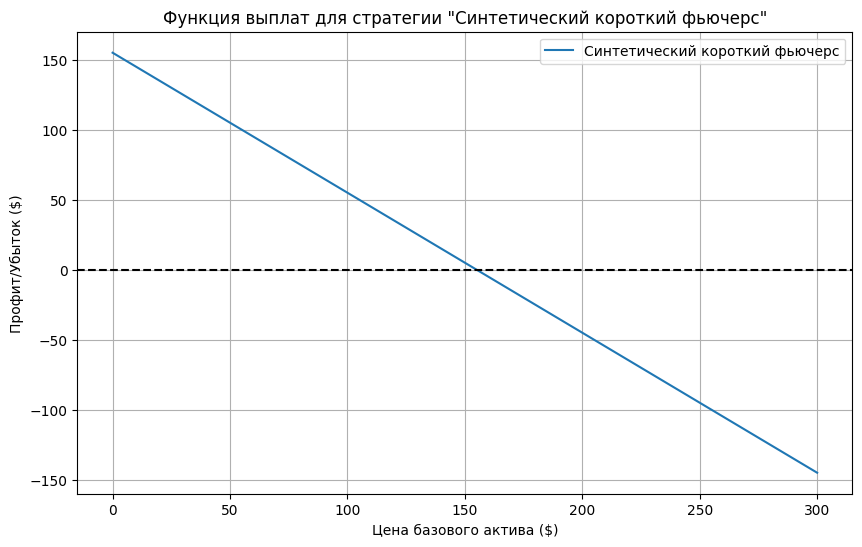

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(S, payoff_synthetic_short, label='Синтетический короткий фьючерс')
plt.xlabel('Цена базового актива ($)')
plt.ylabel('Профит/Убыток ($)')
plt.title('Функция выплат для стратегии "Синтетический короткий фьючерс"')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()


## Задача (оптимальный набор)

Задача. С использование доски опционов [Nasdaq](https://www.nasdaq.com/market-activity/stocks/aapl/option-chain) найдите оптимальный набор опционных контрактов $$
X=\{X_c, X_p\},
$$
где
$$
X_c=\{x_i^c \in
\mathbb{Z}: L\le x_i^c \le U, i \in I\},
$$
$$
X_p=\{x_i^p
\in \mathbb{Z}: L \le x_i^p \le U, i \in I\},
$$
здесь
$x_i^c$, $x_i^p>0$ -- количество опционов колл и пут для покупки, $x_i^c$, $x_i^p<0$ -- для продажи. Если
$x_i^c=0$ или $x_i^p=0$, то $i$-ый контракт
не входит в портфель, $L<0$ и $U>0$ -- нижняя и верхняя границы количества контрактов в портфеле соответственно,
$I=\{1,2, \ldots, n\}$ -- набор индексов.

При разработке стратегии придерживаться следующих преположений
*   покупки и продажи опционов можно осуществлять по ask- и bid-ценам,
*   можно занимать короткие и длинные позиции с учетом ликвидности контракта,
*  стратегия должна иметь защиту от падения и роста цен страйк на $x$\% от стоимости базового актива в момент времени $T$,
*  максимальный убыток стратегии ограничен величиной $\mathcal{L}$, равной $y$% от стоимости базового актива в момент времени $t=0$
*  стратегия имеет начальную стоимость $C(t,X)$, равную $w$ условных единиц капитала.

https://arxiv.org/pdf/1707.02087

In [53]:
import numpy as np
from scipy.optimize import linprog

# Исходные данные
S0 = 230.00  # текущая стоимость базового актива
T = 30  # время до экспирации (в днях)
y = 0.1  # максимальный убыток стратегии (10% от стоимости актива)
x = 0.1  # защита от изменений цены (±10% от стоимости актива)
w = 1000  # начальный капитал
L, U = -5, 5  # ограничения на количество контрактов

# Данные по опционам
strikes = np.array([207.5, 210, 212.5, 215, 217.5, 220, 222.5, 225, 227.5,
                    230, 232.5, 235, 237.5, 240, 242.5, 245, 247.5, 250])
call_prices = np.array([19.41, 18.75, 16.25, 14.00, 11.49, 9.00, 6.60, 4.50,
                        2.54, 1.16, 0.40, 0.11, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01])
put_prices = np.array([0.03, 0.03, 0.05, 0.06, 0.06, 0.11, 0.19, 0.41, 0.97,
                       2.14, 4.06, 6.45, 8.70, 14.00, 15.40, 19.02, 20.95, 21.55])

# Изменение цен базового актива
S_up = S0 * (1 + x)  # цена актива при росте на x%
S_down = S0 * (1 - x)  # цена актива при падении на x%

# Выплаты по опционам (профили выплат)
call_payoff_up = np.maximum(S_up - strikes, 0)
call_payoff_down = np.maximum(S_down - strikes, 0)
put_payoff_up = np.maximum(strikes - S_up, 0)
put_payoff_down = np.maximum(strikes - S_down, 0)

# Целевая функция (затраты на покупку/продажу контрактов)
costs = np.concatenate([call_prices, put_prices])  # цены call и put опционов

# Ограничения на максимальный убыток
loss_constraints = np.concatenate([
    call_payoff_down - call_payoff_up,
    put_payoff_up - put_payoff_down
], axis=0)

# Граничные условия на количество контрактов
bounds = [(L, U) for _ in range(2 * len(strikes))]  # для call и put опционов

# Линейное программирование
result = linprog(
    c=costs,
    A_ub=[-loss_constraints],  # максимальный убыток не превышает y% от S0
    b_ub=[-S0 * y],
    bounds=bounds,
    method='highs'
)

# Результат
if result.success:
    optimal_contracts = result.x
    call_contracts = optimal_contracts[:len(strikes)]
    put_contracts = optimal_contracts[len(strikes):]
    print("Оптимальные контракты (Call):", call_contracts)
    print("Оптимальные контракты (Put):", put_contracts)
else:
    print("Оптимизация не удалась:", result.message)


Оптимальные контракты (Call): [-5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
Оптимальные контракты (Put): [-5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5.]
